# Bootstrap Simulations

The purpose of this in-class notebook is for you to gain some experience with bootstrap simulations. You are expected to complete all exercises and turn in your work on Canvas (due date to be announced).


Student: Adam Ten Hoeve

## Problem #1

Let's compare the "normal theory" confidence interval to the boostrap confidence interval.

#### (a) Generate a sample of size $n = 45$ from an exponential distribution with rate $\lambda = 1$. Calculate $\bar{X}$. 

In [1]:
n = 45
exp = rexp(n = 45, rate = 1)
xbar = mean(exp)
xbar

[1] 0.8046682

#### (b) Calculate B = 500 bootstrap samples, each of size $n$. You might do this in a $n \times B$ matrix, for example, where each column is a boostrap sample. Then, find the mean of each bootstrap sample, denoted $\bar{X}^*_i$, for $i = 1,...,B$. 

In [3]:
B = 500
boots = replicate(B, sample(exp, size = n, replace = TRUE))
head(boots)
dim(boots)

2.1990428,1.3151880,0.5114207,0.2108267,0.8688744,0.21082674,4.39671709,0.4259320,2.46257006,2.1990428,...,0.1719505,0.3838786,0.4884602,2.1885191,0.6569533,1.2370635,0.4893364,0.9586463,0.5119507,4.39671709
0.4884602,0.6569533,1.2340524,0.2108267,2.1885191,0.20617357,0.21082674,0.8832461,0.45630386,1.2340524,...,0.4563039,0.4893364,0.2108267,0.5119507,0.8688744,2.4625701,0.3838786,0.4443789,0.8150281,0.24618296
2.4625701,0.2461830,0.1422951,0.4893364,0.1413085,0.05814851,0.04717689,0.2108267,4.39671709,0.5119507,...,0.1422951,0.3367388,0.3367388,0.8688744,0.6105240,0.1422951,0.8688744,0.1719505,0.4884602,1.31518796
0.9586463,0.1413085,0.6569533,0.6569533,0.9586463,0.28773179,0.33673878,1.1466165,0.88324611,1.2547030,...,0.2461830,0.4060589,0.3838786,0.4157167,0.4884602,0.4259320,0.8022795,0.4060589,2.1990428,0.04717689
0.8688744,0.4893364,0.4893364,0.4443789,0.1719505,0.42593203,0.48846024,1.4421334,0.05814851,0.4884602,...,0.1422951,1.1566422,0.5114207,0.2061736,0.8150281,1.2370635,0.4884602,0.8688744,1.2370635,1.23405236
0.8688744,0.2461830,0.5114207,0.6105240,0.5114207,2.18851913,0.23567527,1.2340524,1.15664225,0.4563039,...,2.1885191,1.6257535,2.1990428,0.8688744,0.4060589,0.5119507,0.3367388,0.1413085,0.4259320,0.51195072


[1]  45 500

In [6]:
xBarStar = colMeans(boots)

#### (c) Use the quantile() function to find the 2.5th and 97.5th percentile of the distribution of each $\bar{X}^*_i$. Use these values to calculate the $95\%$ boostrap confidence interval for $\mu$. 

In [97]:
lower = 2*xbar - as.numeric(quantile(xBarStar, probs = 0.975))
upper = 2*xbar - as.numeric(quantile(xBarStar, probs = 0.025))

cat("The bootstrap CI is [", lower, ", ", upper, "]")

The bootstrap CI is [ 1.294707 ,  1.599515 ]

#### (d) Compute the appropriate "normal theory" confidence interval for $\mu$ (learned in STAT/MATH 4520/5520 or STAT 4000/5000).

In [98]:
sigma = var(exp)
sigma

[1] 1.035316

In [99]:
lower = xbar - 1.96 * sigma / sqrt(n)
upper = xbar + 1.96 * sigma / sqrt(n)
c(lower, upper)

[1] 0.7482969 1.3532933

#### (e) What values can you change above to make these two interval estimates closer to each other?

We could change the number of bootstrap samples B, or because we generated the original sample from a distribution, we could increase the number of samples n. In doing so, we could expect the bootstrap to be more accurate and more accurately approach the "normal" interval.

## Problem #2 

#### (a) Let $X \sim \Gamma(\alpha = 1, \beta = 1/3)$. Generate three random samples each of size $n = 100$ from $X$. Store the samples in objects rsg1, rsg2, and rsg3, respectively.



In [70]:
n = 100
rsg1 = rgamma(n = n, shape = 1, scale = 3)
rsg2 = rgamma(n = n, shape = 1, scale = 3)
rsg3 = rgamma(n = n, shape = 1, scale = 3)

#### (b)  Generate $B=10^4 - 1$ boostrap samples from rsg1, rsg2, and rsg3. A bootstrap sample is a sample of the same size as the original sample taken with replacement. 

In [71]:
B = (10^4 - 1)
boots1 = replicate(B, sample(rsg1, size = n, replace = TRUE))
boots2 = replicate(B, sample(rsg2, size = n, replace = TRUE))
boots3 = replicate(B, sample(rsg3, size = n, replace = TRUE))

#### (c) Apply the mean to each bootstrap sample and store the means of the bootstrapped samples from rsg1, rsg2, and rsg3 in the objects ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3, respectively.


In [72]:
ThetaHatStar1 = colMeans(boots1)
ThetaHatStar2 = colMeans(boots2)
ThetaHatStar3 = colMeans(boots3)

#### (d) What is the exact sampling distribution of $\bar{X}$?

We can use mgf's to figure out the distribution of $\bar{X}$. But I'm not entirely sure how to do this so I know the sample mean should approach the distribution $\bar{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}}) = N(3, \frac{3}{100})$. These are the numbers I will use in the following parts.

#### (e) Compute the estimated boostrap bias of $\bar{X}$, $Bias_{\widehat{f}}[\bar{X}] = \bar{X}^* - \bar{X}$ using the values in  ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3.

In [73]:
xbar1 = mean(rsg1)
xStarBar1 = mean(ThetaHatStar1)
mean1 = xStarBar1 - xbar1

xbar2 = mean(rsg2)
xStarBar2 = mean(ThetaHatStar2)
mean2 = xStarBar2 - xbar2

xbar3 = mean(rsg3)
xStarBar3 = mean(ThetaHatStar3)
mean3 = xStarBar3 - xbar3

mean1
mean2
mean3

[1] -0.002555954

[1] 0.0009766292

[1] -0.0006865373

#### (f) Compute the estimated bootstrap standard error of $\bar{X}$ using the values in ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3.

In [74]:
se1 = sqrt(sum((ThetaHatStar1 - xStarBar1)^2) / (B - 1))
se2 = sqrt(sum((ThetaHatStar2 - xStarBar2)^2) / (B - 1))
se3 = sqrt(sum((ThetaHatStar3 - xStarBar3)^2) / (B - 1))

se1
se2
se3

[1] 0.2649892

[1] 0.3216542

[1] 0.3090551

#### (g) Graph the distributions of $X$, $\bar{X}$, rsg1, rsg2,  rsg3, ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3. Specifically, place density estimates of rsg1, rsg2,  and rsg3 clearly beneath the distribution of $X$. Use a solid vertical line to denote $E(X)$ for all four graphs. Place a dashed vertical line in the density estimates of rsg1, rsg2,  and rsg3 at the mean of the values in the respective objects. Place density estimates of ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3 directly beneath the distribution of $\bar{X}$. Use a solid vertical line to denote $E(\bar{X})$ for all four graphs. Place a dashed vertical line in the density estimatse of ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3 at the mean of the values in the respective objects.

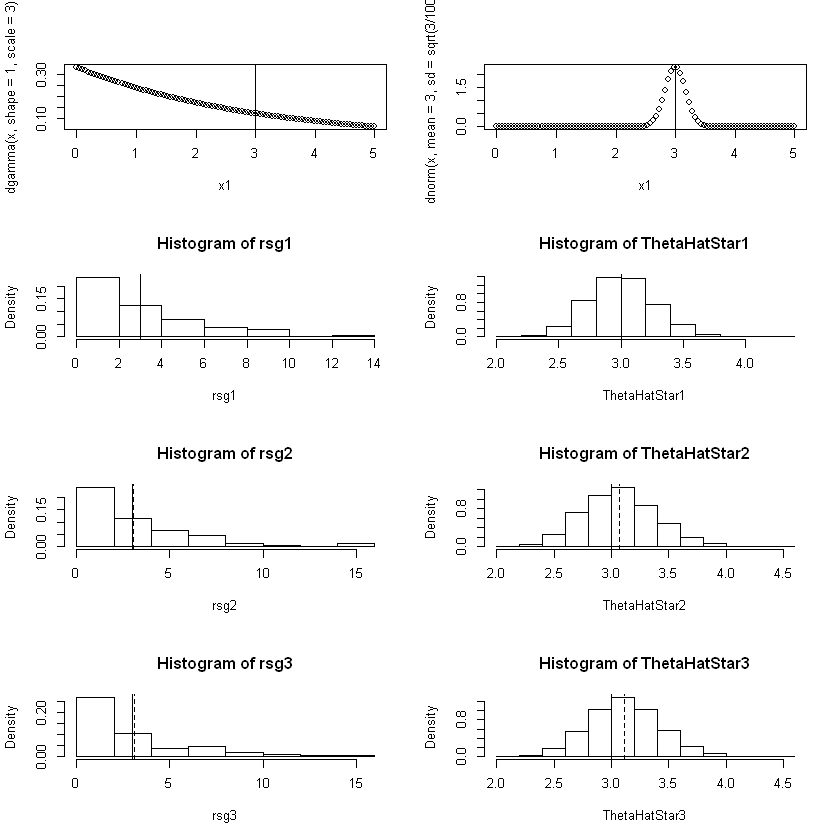

In [75]:
par(mfrow = c(4, 2)) # Create pane of 4 rows and 2 columns
x1 = seq(0, 5, len = 100)
x2 = seq(2, 5, len = 100)

plot(x = x1, y = dgamma(x, shape = 1, scale = 3)); abline(v = 3);
plot(x = x1, y = dnorm(x, mean = 3, sd = sqrt(3/100))); abline(v = 3)
hist(rsg1, freq = FALSE); abline(v = 3); abline(v = xbar1, lty = 2)
hist(ThetaHatStar1, freq = FALSE); abline(v = 3); abline(v = xStarBar1, lty = 2)
hist(rsg2, freq = FALSE); abline(v = 3); abline(v = xbar2, lty = 2)
hist(ThetaHatStar2, freq = FALSE); abline(v = 3); abline(v = xStarBar2, lty = 2)
hist(rsg3, freq = FALSE); abline(v = 3); abline(v = xbar3, lty = 2)
hist(ThetaHatStar3, freq = FALSE); abline(v = 3); abline(v = xStarBar3, lty = 2)

#### (e) Discuss the bias, shape, and spread of the bootstrap distributions of $\bar{X}$.

 The bootstrap distributions form normal distributions with a mean around 3 that extends to $\sim [2,4]$. The bootstrap distributions are unbiased because $Bias(\bar{X}) = E[\bar{X}] - \mu = \frac{1}{n}\sum^n_i E[x_i] - \mu = \mu - \mu = 0$.

## Problem #3: Bootstrap Confidence Intervals

Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$. Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.


#### (a) Generate a sample of size $n = 8$ from $\Gamma(\alpha = 1, \beta = 1/3)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).


In [1]:
n = 8
gamma = rgamma(n = 8, 1, 1/3)

[1] 0.52496997 1.09696959 2.98460716 0.01701893 0.09738060 0.12951738 2.05974556
[8] 4.79425242

Standard Deviation = $\sqrt{ \alpha / \beta^2} = \sqrt{1 / (1/3)^2} = 3$

#### (b) Generate $B = 200$ bootstrap samples from the above sample. 

In [9]:
B = 200
boots = replicate(B, sample(gamma, length(gamma), replace = TRUE))
dim(boots)

[1]   8 200

#### (c) Calculate the MLE of $\theta$ for the original sample. Denote this as $\widehat{\theta}$. Then, calculate the MLE of $\theta$ for each bootstrap sample. Denote this as $\widehat{\theta}^*_i$, for $i = 1,...,B$. Avoid loops! (HINT: use the apply() function.)

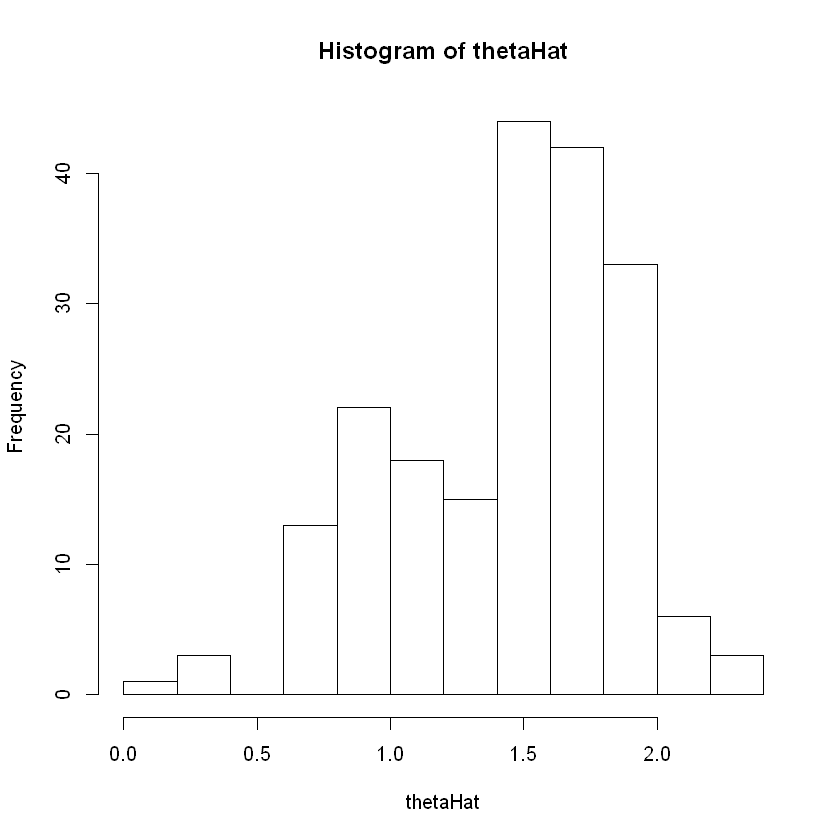

In [12]:
thetaHat = sqrt((n-1)/n) * apply (boots, 2, sd)
hist(thetaHat)

#### (d) Use the quantile() function to find the 5th and 95th percentile of the distribution of $\widehat{\theta}^*_i$. Use these values to calculate the $90\%$ boostrap confidence interval for $\theta$. 

In [15]:
q = as.numeric(quantile(thetaHat, c(0.05, 0.95)))
l = 2*sqrt((n-1) / n) * sd(gamma) - q[2]
u = 2*sqrt((n-1) / n) * sd(gamma) - q[1]
CI = c(l, u)
CI

[1] 1.210315 2.521138

#### (e) Interpret this confidence interval.

From the bootstrap, we know that 9 out of 10 times the standard deviation will lie between $[1.21, 2.52]$.

## Problem #4

Suppose one wants to estimate the sd in the number of hours that people work in a week. One draws a random sample of size 8, and finds $\mathbf{x} = (40, 35, 40, 0, 0, 40, 50, 10)$.

#### (a) Find the MLE for the standard deviation of the sample.

$\sigma^2_{MLE} = 1/n * \sum(x_i - \bar{x})^2 $

In [16]:
x = c(40, 35, 40, 0, 0, 40, 50, 10)
xbar = mean(x)
sigma = sqrt(1/length(x) * sum((x - xbar)^2))
cat("The MLE for the standard deviation is", sigma)

The MLE for the standard deviation is 18.86424

#### (b) Draw $B = 500$ boostrap samples from this sample and calculate the MLE of the standard deviation for each.

In [19]:
MLE <- function(x){
    return(sqrt(1/length(x) * sum((x - xbar)^2)))
}

In [26]:
B = 500
boots = replicate(B, sample(x, size = length(x), replace = TRUE))
bootsSigma = apply(boots, 2, function(x) MLE(x))
head(bootsSigma)

[1] 16.96734 15.11673 17.62234 20.94450 20.02928 18.96749

#### (c) Find the 95% pivot bootstrap confidence interval for the population standard deviation.

In [27]:
lower = 2*xbar - as.numeric(quantile(bootsSigma, probs = 0.975))
upper = 2*xbar - as.numeric(quantile(bootsSigma, probs = 0.025))
CI = c(lower, upper)
cat("The pivot confidence interval is ", CI)

The pivot confidence interval is  30.50459 39.97535

## Problem #5

The newcomb dataset contains a numeric vector giving the ‘Third Series’ of measurements of the passage time of light recorded by Newcomb in 1882. The given values divided by 1000 plus 24 give the time in millionths of a second for light to traverse a known distance. The ‘true’ value is now considered to be 33.02.

Our goal is to test the hypotheses that $$H_0: \mu = 33.02 \, \, vs. \, \, 
H_1: \mu \ne 33.02.$$

We will choose the $\alpha = 0.05$ level, and use $\bar{X}$ as the test statistic. 

#### (a) Load the newcomb data and decide whether you think it comes from a normal distribution.

[1] 26.21212


	Shapiro-Wilk normality test

data:  newcomb
W = 0.59115, p-value = 2.842e-12


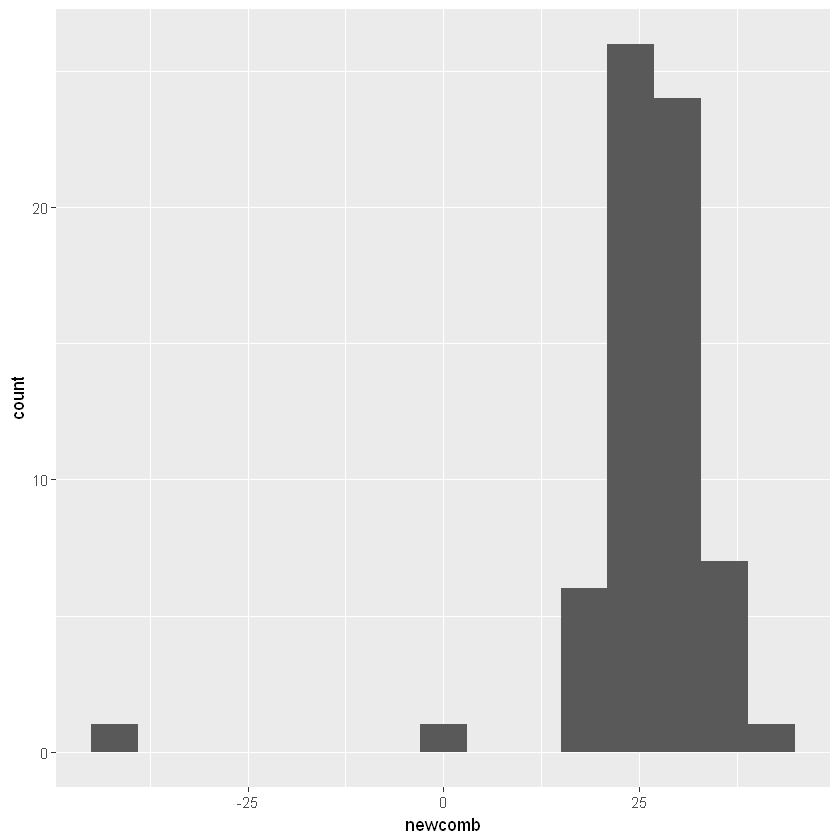

In [2]:
library(MASS)
data(newcomb); xbar = mean(newcomb); 
n = length(newcomb);
xbar
df = data.frame(newcomb);
library(ggplot2)
ggplot(data = df)+
geom_histogram(mapping = aes(x = newcomb), bins = 15)

shapiro.test(newcomb)

Now, since our test statistic is $\bar{X}$, the CLT *might* help us. But maybe not. So, let's assume not (and we might see why later). We'll use the bootstrap to test our hypotheses.

#### (b) Shift the data so that the mean is the value under the null.

In [5]:
newnewcomb = newcomb - mean(newcomb) + 33.02; mean(newnewcomb)

[1] 33.02

This shifted data now serves as a stand in for our population. We use it to resample from.

#### (c) Resample with replacement from the data $B = 10^5$ times and calculate the mean for each sample.

[1]     66 100000

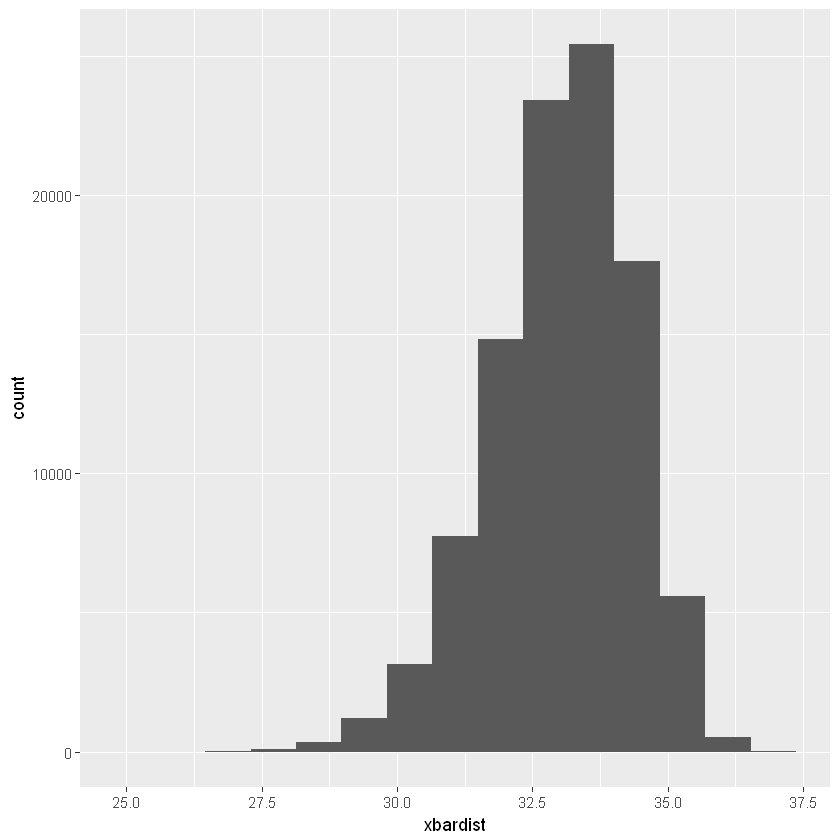

In [8]:
B = 10^5; bs = replicate(B, sample(newnewcomb, n, replace = TRUE)); dim(bs)
xbardist = colMeans(bs); 
xbardistst = (xbardist - mean(xbardist))/sd(xbardist)
dfmeans = data.frame(xbardist)
ggplot(data = dfmeans)+geom_histogram(mapping = aes(x = xbardist), bins = 15)

Notice that the distribution here is skewed left, and thus, not normal. So, we were right not to use the "normal theory" result!

The p-value is the probability of getting something more extreme than what we observed. 26.21--the observed sample mean--is $33.02 - 26.21 = 6.81$ units away from the mean under $H_0$. So our p-value is the probability of being more than 6.81 units away from 33.02.

In [9]:
d = c(33.02 - abs(33.02 - xbar), 33.02 + abs(33.02 - xbar))

pvalue = (sum(xbardist < d[1]) + sum(xbardist > d[2]))/B
cat("The p-value is", pvalue,".")

The p-value is 1e-05 .

Note that the p-value is less than $\alpha = 0.05$, so we would reject $H_0$.  

We can compare this to a t-test, but we should note that the t-test isn't appropriate because the normal population assumption isn't met.

In [11]:
t.test(newcomb,alternative="two.sided",mu=33.02)


	One Sample t-test

data:  newcomb
t = -5.1471, df = 65, p-value = 2.648e-06
alternative hypothesis: true mean is not equal to 33.02
95 percent confidence interval:
 23.57059 28.85365
sample estimates:
mean of x 
 26.21212 
